In [30]:
import urllib.request
import json
import gzip
import shutil
import re
from collections import Counter
import matplotlib.pylab as plt
import numpy as np
import networkx as nx
from fa2 import ForceAtlas2


In [2]:
#query = "https://api.stackexchange.com//2.2/questions?pagesize=100&fromdate=1543881600&todate=1572998400&order=desc&sort=votes&site=stackoverflow&filter=!9Z(-wwK0y"

In [3]:
#response = urllib.request.urlopen(query)
#gzipFile = gzip.GzipFile(fileobj=response)
#src = gzipFile.read()
#src = response.read()
#stackjson = json.loads(src)
#string = json.dumps(stackjson)
#stackjson

In [4]:
#i = 0
#for question in stackjson['items']:
#    print(question['tags'])
#    print(i)
#    i+=1

In [5]:
#list of jsons
jsons = []

allTags = []

# variables
oneYear=86400*365
oneMonth=int(oneYear/12)
todate=1572998400
fromdate=1572998400-oneMonth
# 10 years back
yearList = []
for i in range(1,11):
    print("i",i)
    year = []
    for ii in range (1,13):
        print("ii", ii)
        print("todate",todate,"fromdate",fromdate)
        query = "https://api.stackexchange.com//2.2/questions?pagesize=100&fromdate={}&todate={}&order=desc&sort=votes&site=stackoverflow&filter=!9Z(-wwK0y".format(fromdate,todate)
        response = urllib.request.urlopen(query)
        gzipFile = gzip.GzipFile(fileobj=response)
        src = gzipFile.read()
        stackjson = json.loads(src)
        jsons.append(stackjson)
        for question in stackjson['items']:
            taglist = [re.sub(r"(-)*(\d)+(\..)*","",tag) for tag in question['tags']]
            allTags.extend(list(dict.fromkeys(taglist)))
            year.extend(list(dict.fromkeys(taglist)))
        todate-=oneMonth
        fromdate-=oneMonth
    yearList.append(year)

i 1
ii 1
todate 1572998400 fromdate 1570370400
ii 2
todate 1570370400 fromdate 1567742400
ii 3
todate 1567742400 fromdate 1565114400
ii 4
todate 1565114400 fromdate 1562486400
ii 5
todate 1562486400 fromdate 1559858400
ii 6
todate 1559858400 fromdate 1557230400
ii 7
todate 1557230400 fromdate 1554602400
ii 8
todate 1554602400 fromdate 1551974400
ii 9
todate 1551974400 fromdate 1549346400
ii 10
todate 1549346400 fromdate 1546718400
ii 11
todate 1546718400 fromdate 1544090400
ii 12
todate 1544090400 fromdate 1541462400
i 2
ii 1
todate 1541462400 fromdate 1538834400
ii 2
todate 1538834400 fromdate 1536206400
ii 3
todate 1536206400 fromdate 1533578400
ii 4
todate 1533578400 fromdate 1530950400
ii 5
todate 1530950400 fromdate 1528322400
ii 6
todate 1528322400 fromdate 1525694400
ii 7
todate 1525694400 fromdate 1523066400
ii 8
todate 1523066400 fromdate 1520438400
ii 9
todate 1520438400 fromdate 1517810400
ii 10
todate 1517810400 fromdate 1515182400
ii 11
todate 1515182400 fromdate 151255440

In [6]:
#Tags per year
tags2019 = [re.sub(r"(-)*(\d)+(\..)*","",tag) for tag in yearList[0]] 
tags2018 = [re.sub(r"(-)*(\d)+(\..)*","",tag) for tag in yearList[1]] 
tags2017 = [re.sub(r"(-)*(\d)+(\..)*","",tag) for tag in yearList[2]] 
tags2016 = [re.sub(r"(-)*(\d)+(\..)*","",tag) for tag in yearList[3]] 
tags2015 = [re.sub(r"(-)*(\d)+(\..)*","",tag) for tag in yearList[4]] 
tags2014 = [re.sub(r"(-)*(\d)+(\..)*","",tag) for tag in yearList[5]] 
tags2013 = [re.sub(r"(-)*(\d)+(\..)*","",tag) for tag in yearList[6]] 
tags2012 = [re.sub(r"(-)*(\d)+(\..)*","",tag) for tag in yearList[7]] 
tags2011 = [re.sub(r"(-)*(\d)+(\..)*","",tag) for tag in yearList[8]] 
tags2010 = [re.sub(r"(-)*(\d)+(\..)*","",tag) for tag in yearList[9]] 

#Dict pr. year
tags2019dict = Counter(tags2019)
tags2018dict = Counter(tags2018)
tags2017dict = Counter(tags2017)
tags2016dict = Counter(tags2016)
tags2015dict = Counter(tags2015)
tags2014dict = Counter(tags2014)
tags2013dict = Counter(tags2013)
tags2012dict = Counter(tags2012)
tags2011dict = Counter(tags2011)
tags2010dict = Counter(tags2010)


In [7]:
allTags = [re.sub(r"(-)*(\d)+(\..)*","",tag) for tag in allTags]
tagDict = Counter(allTags)
#tagDictOrd = OrderedDict(sorted(d.items(), key=lambda t: t[1]))
#allTags
#print(tagDict)

PLOT HER

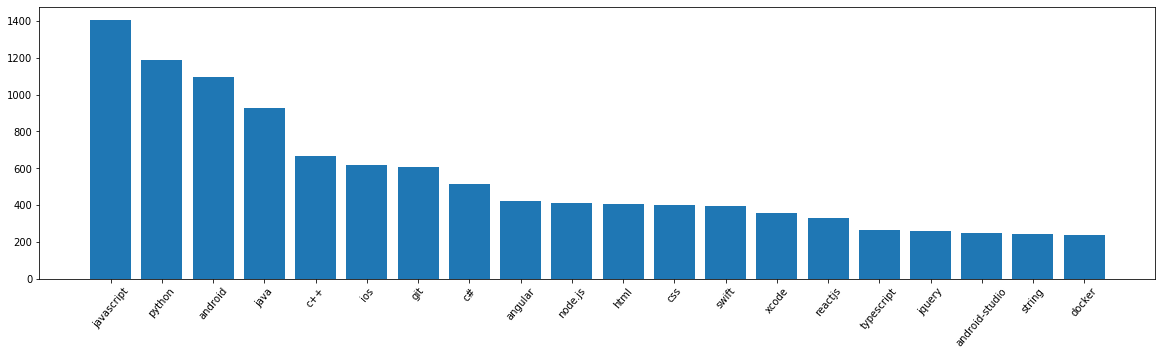

In [8]:
sorted_x = sorted(tagDict.items(), key=lambda kv: kv[1], reverse=True)
n_items = sorted_x[0:20]
x, y = zip(*n_items) # unpack a list of pairs into two tuples
plt.figure(figsize=(20,5))
plt.bar(x, y)
plt.xticks(rotation=50)
plt.show()

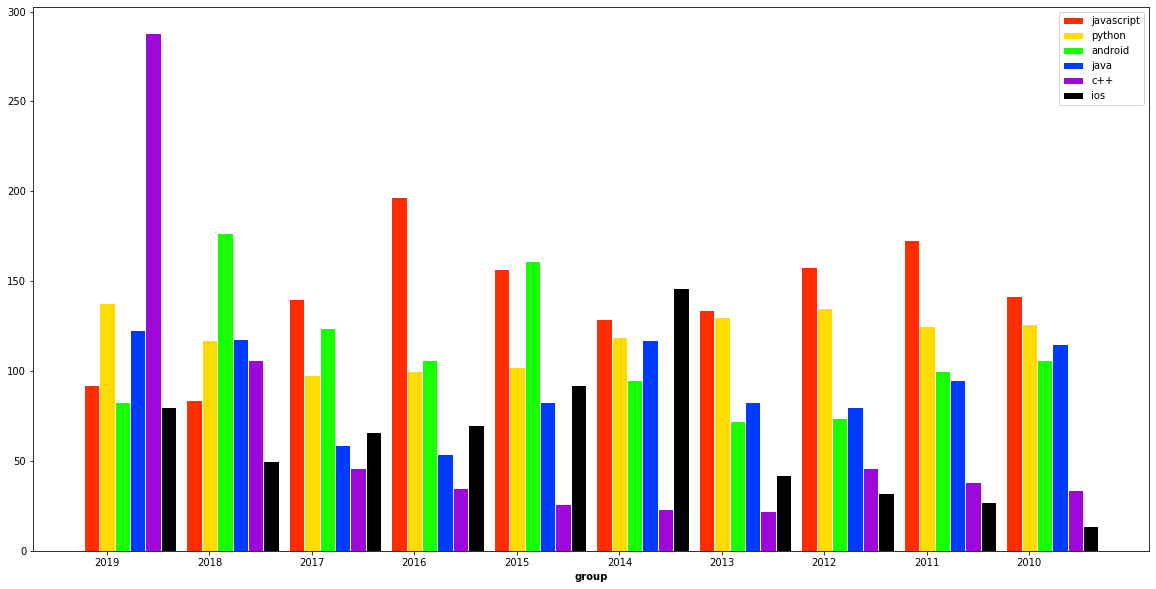

In [9]:
plt.figure(figsize=(20,10))

# set width of bar
barWidth = 0.15

# x-values
barsWord1 = [tags2019dict[x[0]], tags2018dict[x[0]], tags2017dict[x[0]], tags2016dict[x[0]], tags2015dict[x[0]], tags2014dict[x[0]], tags2013dict[x[0]], tags2012dict[x[0]], tags2011dict[x[0]],tags2010dict[x[0]]]
barsWord2 = [tags2019dict[x[1]], tags2018dict[x[1]], tags2017dict[x[1]], tags2016dict[x[1]], tags2015dict[x[1]], tags2014dict[x[1]], tags2013dict[x[1]], tags2012dict[x[1]], tags2011dict[x[1]],tags2010dict[x[1]]]
barsWord3 = [tags2019dict[x[2]], tags2018dict[x[2]], tags2017dict[x[2]], tags2016dict[x[2]], tags2015dict[x[2]], tags2014dict[x[2]], tags2013dict[x[2]], tags2012dict[x[2]], tags2011dict[x[2]],tags2010dict[x[2]]]
barsWord4 = [tags2019dict[x[3]], tags2018dict[x[3]], tags2017dict[x[3]], tags2016dict[x[3]], tags2015dict[x[3]], tags2014dict[x[3]], tags2013dict[x[3]], tags2012dict[x[3]], tags2011dict[x[3]],tags2010dict[x[3]]]
barsWord5 = [tags2019dict[x[4]], tags2018dict[x[4]], tags2017dict[x[4]], tags2016dict[x[4]], tags2015dict[x[4]], tags2014dict[x[4]], tags2013dict[x[4]], tags2012dict[x[4]], tags2011dict[x[4]],tags2010dict[x[4]]]
barsWord6 = [tags2019dict[x[5]], tags2018dict[x[5]], tags2017dict[x[5]], tags2016dict[x[5]], tags2015dict[x[5]], tags2014dict[x[5]], tags2013dict[x[5]], tags2012dict[x[5]], tags2011dict[x[5]],tags2010dict[x[5]]]


# Set position of bar on X axis
r1 = np.arange(len(barsWord1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]

 
# Make the plot
plt.bar(r1, barsWord1, color='#FF2D00', width=barWidth, edgecolor='white', label=x[0])
plt.bar(r2, barsWord2, color='#FFDC00', width=barWidth, edgecolor='white', label=x[1])
plt.bar(r3, barsWord3, color='#18FF00', width=barWidth, edgecolor='white', label=x[2])
plt.bar(r4, barsWord4, color='#003CFF', width=barWidth, edgecolor='white', label=x[3])
plt.bar(r5, barsWord5, color='#9E09DA', width=barWidth, edgecolor='white', label=x[4])
plt.bar(r6, barsWord6, color='#000000', width=barWidth, edgecolor='white', label=x[5])

 
# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(barsWord1))], ['2019','2018','2017','2016','2015','2014','2013','2012','2011','2010'])
 
# Create legend & Show graphic
plt.legend()
plt.show()

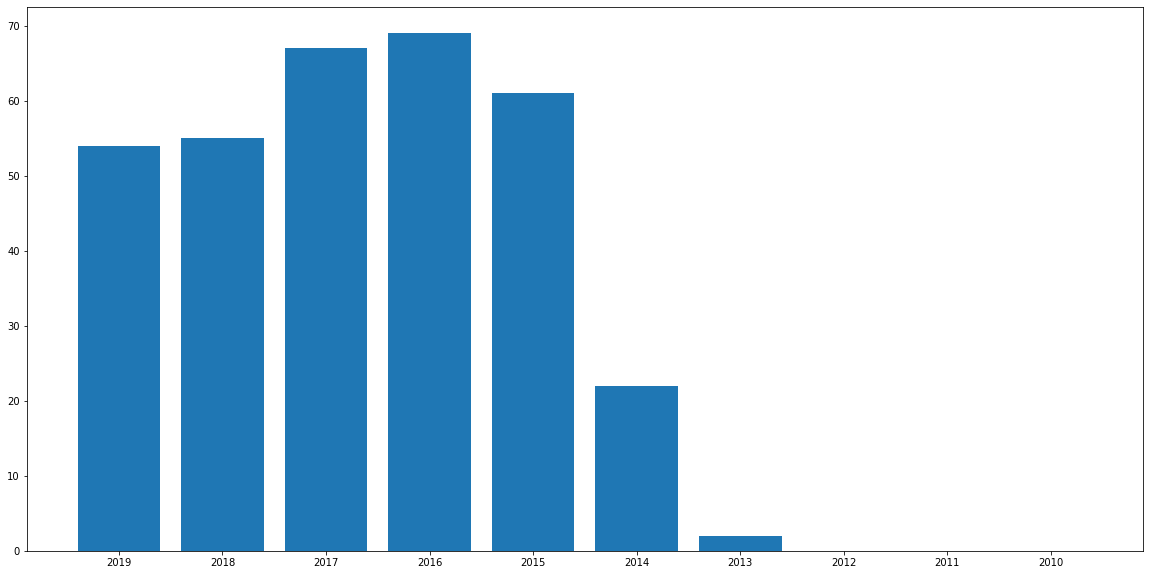

In [10]:
barsreact = [tags2019dict['reactjs'], tags2018dict['reactjs'], tags2017dict['reactjs'], tags2016dict['reactjs'], tags2015dict['reactjs'], tags2014dict['reactjs'], tags2013dict['reactjs'], tags2012dict['reactjs'], tags2011dict['reactjs'],tags2010dict['reactjs']]

plt.figure(figsize=(20,10))
plt.bar(['2019','2018','2017','2016','2015','2014','2013','2012','2011','2010'],barsreact)
plt.show()

In [43]:
network = nx.Graph()
network.add_nodes_from(list(dict.fromkeys(allTags)))
for json in jsons:
    for question in json['items']:
        taglisthelper = [re.sub(r"(-)*(\d)+(\..)*","",tag) for tag in question['tags']]
        for tag in taglisthelper:
            for tag2 in taglisthelper:
                network.add_edge(tag,tag2)

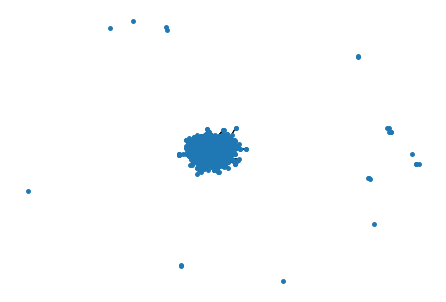

In [44]:
nx.draw(network, node_size=15)

In [22]:
len(list(network.nodes))

4703

In [24]:
print(len(allTags))
print(len(network.edges))

35890
27652


In [45]:
multiTagDict = {}
for tag in tagDict:
    if tagDict[tag] > 1:
        multiTagDict[tag] = tagDict[tag]
        #bprint("tagdict[tag]", tagDict[tag])
        #print("multiTagDict[tag]",multiTagDict[tag])

In [46]:
len(multiTagDict)

2379

In [81]:
networkSmall = nx.Graph()
networkSmall.add_nodes_from(list(dict.fromkeys(multiTagDict)))
print(len(list(networkSmall.nodes)))

2379


In [49]:
for json in jsons:
    for question in json['items']:
        taglisthelper = [re.sub(r"(-)*(\d)+(\..)*","",tag) for tag in question['tags']]
        for tag in taglisthelper:
            if tag in multiTagDict:
                for tag2 in taglisthelper:
                    if tag2 in multiTagDict:
                        networkSmall.add_edge(tag,tag2)
print(len(networkSmall.edges))

19192


C:\Users\mads_\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


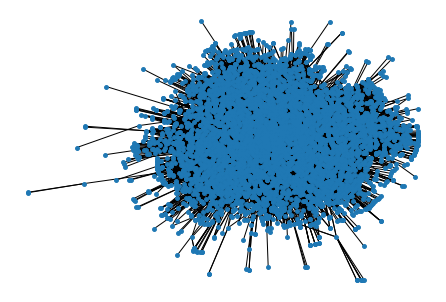

In [29]:
lcc = max(nx.connected_component_subgraphs(network),key=len)
nx.draw(lcc, node_size=15)

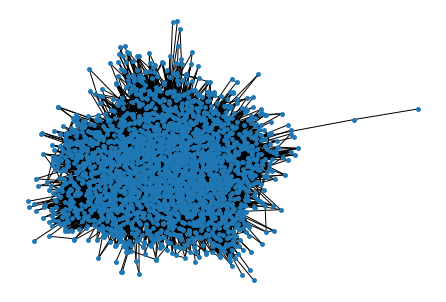

In [50]:
lccSmall = max(nx.connected_component_subgraphs(networkSmall),key=len)
nx.draw(lccSmall, node_size=15)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:57<00:00,  1.78it/s]


BarnesHut Approximation  took  4.53  seconds
Repulsion forces  took  51.55  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.08  seconds
AdjustSpeedAndApplyForces step  took  0.39  seconds


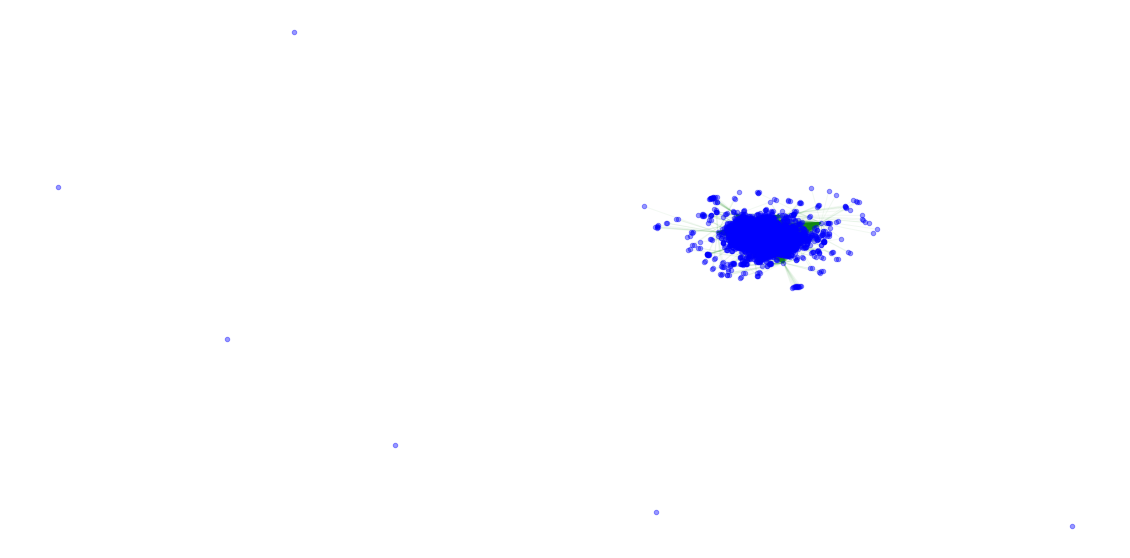

In [36]:
plt.figure(figsize=(20,10))

forceatlas2 = ForceAtlas2(
                        # Behavior alternatives
                        outboundAttractionDistribution=True,  # Dissuade hubs
                        linLogMode=False,  # NOT IMPLEMENTED
                        adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                        edgeWeightInfluence=1.0,

                        # Performance
                        jitterTolerance=1.0,  # Tolerance
                        barnesHutOptimize=True,
                        barnesHutTheta=1.2,
                        multiThreaded=False,  # NOT IMPLEMENTED

                        # Tuning
                        scalingRatio=2.0,
                        strongGravityMode=True,
                        gravity=10.0,

                        # Log
                        verbose=True)

positions = forceatlas2.forceatlas2_networkx_layout(network, pos=None, iterations=100)
nx.draw_networkx_nodes(network, positions, node_size=20, with_labels=False, node_color="blue", alpha=0.4)
nx.draw_networkx_edges(network, positions, edge_color="green", alpha=0.05)
plt.axis('off')
plt.show()


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:05<00:00, 15.85it/s]


BarnesHut Approximation  took  1.16  seconds
Repulsion forces  took  4.46  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.03  seconds
AdjustSpeedAndApplyForces step  took  0.07  seconds


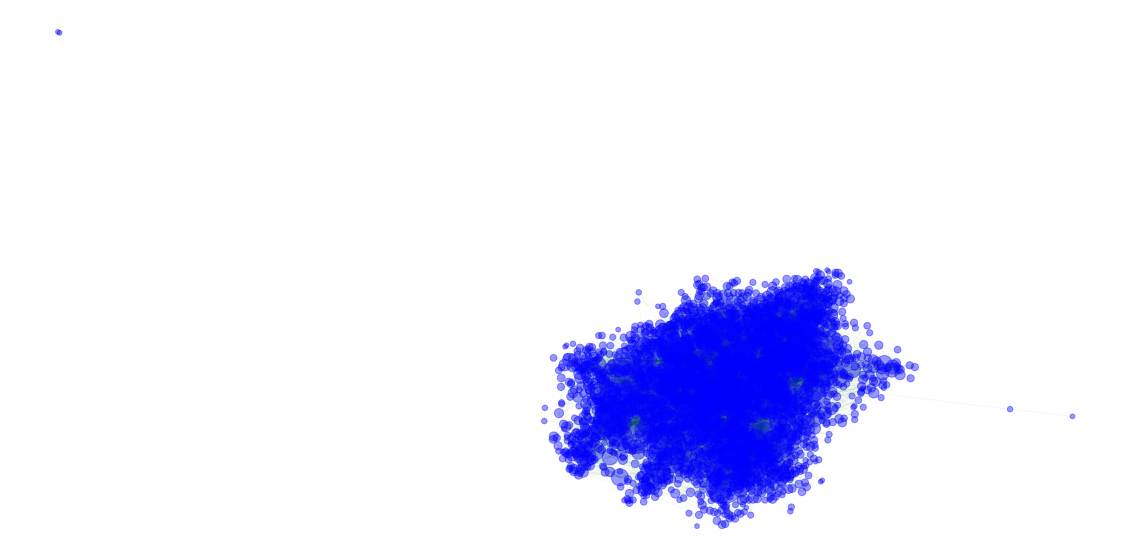

In [79]:
plt.figure(figsize=(20,10))

forceatlas2Small = ForceAtlas2(
                        # Behavior alternatives
                        outboundAttractionDistribution=False,  # Dissuade hubs
                        linLogMode=False,  # NOT IMPLEMENTED
                        adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                        edgeWeightInfluence=1.0,

                        # Performance
                        jitterTolerance=1.0,  # Tolerance
                        barnesHutOptimize=True,
                        barnesHutTheta=1.2,
                        multiThreaded=False,  # NOT IMPLEMENTED

                        # Tuning
                        scalingRatio=2.0,
                        strongGravityMode=False,
                        gravity=1.0,

                        # Log
                        verbose=True)

degreeDict = dict(networkSmall.degree)

positionsSmall = forceatlas2Small.forceatlas2_networkx_layout(networkSmall, pos=None, iterations=100)
nx.draw_networkx_nodes(networkSmall, positionsSmall, node_size=[rescale(v,2,650,15,5000) for v in degreeDict.values()], with_labels=False, node_color="blue", alpha=0.4)
nx.draw_networkx_edges(networkSmall, positionsSmall, edge_color="green", alpha=0.05)
plt.axis('off')
plt.show()


In [56]:
networkSmall.degree()

DegreeView({'ios': 279, 'swift': 235, 'xcode': 177, 'uitextview': 12, 'bash': 126, 'git': 203, 'macos': 156, 'zsh': 13, 'macos-catalina': 20, 'c': 181, 'python': 576, 'boolean-logic': 12, 'linux': 170, 'assembly': 33, 'mmap': 9, 'tensorflow': 39, 'keras': 20, 'performance-testing': 9, 'c++': 347, 'unique-ptr': 14, 'calling-convention': 8, 'abi': 21, 'android': 478, 'cordova': 26, 'ionic-framework': 16, 'ionic': 17, 'build.gradle': 26, 'list': 84, 'tuples': 24, 'objective-c': 100, 'wkwebview': 8, 'multithreading': 55, 'thread-safety': 12, 'ruby': 101, 'floating-point': 60, 'javascript': 640, 'google-chrome': 97, 'cookies': 31, 'samesite': 5, 'visual-c++': 17, 'java': 546, 'c#': 319, '.net': 156, 'datetime': 47, '.net-core': 55, 'datetime-format': 12, 'haskell': 46, 'functional-programming': 42, 'string': 173, 'while-loop': 18, 'jvm': 33, 'jit': 18, 'recursion': 24, 'mongodb': 52, 'gcc': 53, 'generics': 36, 'lambda': 65, 'type-inference': 16, 'method-reference': 10, 'uinavigationcontroll

In [60]:
for key, value in sorted(dict(networkSmall.degree()).items(), key=lambda item: item[1], reverse=True):
    print("%s: %s" % (key, value))

javascript: 640
python: 576
java: 546
android: 478
c++: 347
c#: 319
ios: 279
html: 251
node.js: 251
swift: 235
git: 203
php: 187
c: 181
css: 181
xcode: 177
string: 173
jquery: 172
angular: 171
linux: 170
macos: 156
.net: 156
performance: 155
arrays: 152
reactjs: 135
android-studio: 134
typescript: 133
angularjs: 132
json: 130
bash: 126
windows: 119
mysql: 119
visual-studio: 116
language-lawyer: 114
docker: 110
ruby: 101
shell: 101
objective-c: 100
google-chrome: 97
npm: 97
http: 95
file: 94
ubuntu: 93
sql: 93
github: 92
rest: 88
pandas: 87
list: 84
syntax: 82
ecmascript: 81
gradle: 79
postgresql: 76
kotlin: 75
command-line: 75
ruby-on-rails: 73
r: 73
algorithm: 71
debugging: 69
asp.net: 69
function: 68
pip: 66
numpy: 66
lambda: 65
unix: 65
intellij-idea: 62
android-gradle-plugin: 62
twitter-bootstrap: 62
dataframe: 61
optimization: 61
security: 61
types: 61
floating-point: 60
if-statement: 60
iphone: 60
variables: 60
laravel: 59
react-native: 59
database: 59
dictionary: 58
spring: 58
v

margin: 15
tcp: 15
sudo: 15
constraints: 15
ssh-keys: 15
jquery-ui: 15
scp: 15
io: 15
unique-ptr: 14
swiftui: 14
c++-standard-library: 14
function-pointers: 14
default-value: 14
overriding: 14
selenium-webdriver: 14
closures: 14
std: 14
websocket: 14
avd: 14
portability: 14
synchronization: 14
intel: 14
dom-events: 14
size: 14
github-pages: 14
angular-material: 14
statistics: 14
facebook-graph-api: 14
assignment-operator: 14
macos-high-sierra: 14
google-colaboratory: 14
ascii: 14
llvm: 14
mobile: 14
zip: 14
vectorization: 14
final: 14
matrix: 14
time-complexity: 14
graph: 14
floating-action-button: 14
imagemagick: 14
arm: 14
android-toolbar: 14
mvvm: 14
rvm: 14
compatibility: 14
resharper: 14
mysql-error: 14
conv-neural-network: 14
android-resources: 14
youtube: 14
hashmap: 14
state: 14
apache-spark-sql: 14
resources: 14
python-import: 14
keyboard-shortcuts: 14
mobile-safari: 14
angular-http: 14
url-routing: 14
cross-domain: 14
native: 14
spring-data: 14
gson: 14
frameworks: 14
html-in

evaluation: 9
traits: 9
processing-efficiency: 9
gradle-plugin: 9
source-maps: 9
dagger: 9
android-databinding: 9
protocols: 9
redux-thunk: 9
crashlytics-android: 9
pull-request: 9
react-native-ios: 9
comparison-operators: 9
list-initialization: 9
icc: 9
implementation-defined-behavior: 9
microbenchmark: 9
iostream: 9
side-effects: 9
android-build: 9
.net-framework-version: 9
identifier: 9
hammer.js: 9
contiguous: 9
python-decorators: 9
angular-components: 9
jdbc: 9
timer: 9
strong-typing: 9
recurrent-neural-network: 9
task: 9
cmake: 9
bottomnavigationview: 9
push-notification: 9
git-fork: 9
copy-paste: 9
android-textinputlayout: 9
webdriver: 9
cudnn: 9
package-lock.json: 9
pseudo-element: 9
mapping: 9
android-coordinatorlayout: 9
protected: 9
default-method: 9
ram: 9
rendering: 9
unsupported-class-version: 9
encapsulation: 9
openshift: 9
browser-sync: 9
rails-migrations: 9
syntax-highlighting: 9
mean-stack: 9
picasso: 9
vue-router: 9
pivot: 9
background-service: 9
safearealayoutguide:

submit: 7
ddd-repositories: 7
sandbox: 7
getelementbyid: 7
spark-submit: 7
enumeration: 7
recycler-adapter: 7
remote-branch: 7
nsoperation: 7
http-request: 7
rake: 7
hashtag: 7
linked-list: 7
flux: 7
javascript-framework: 7
activerecord: 7
keystore: 7
ca: 7
database-normalization: 7
crud: 7
use-case: 7
public-key-encryption: 7
python-datetime: 7
npm-scripts: 7
xamarin.forms: 7
nsdata: 7
getter-setter: 7
android-actionbaractivity: 7
appcompatactivity: 7
meclipse: 7
verbatim-string: 7
parse-platform: 7
http-patch: 7
dll: 7
root: 7
nsjsonserialization: 7
data-visualization: 7
api-design: 7
dereference: 7
nsuserdefaults: 7
shadow: 7
vertical-alignment: 7
absolute: 7
woff: 7
laravel-migrations: 7
checked-exceptions: 7
android-actionbar-compat: 7
makefile: 7
ng-repeat: 7
nslayoutconstraint: 7
uicollectionviewcell: 7
change-password: 7
avplayerviewcontroller: 7
angular-ui: 7
language-comparisons: 7
cllocationmanager: 7
unix-timestamp: 7
init: 7
firefox-addon: 7
uirefreshcontrol: 7
xcertificat

uiactivityviewcontroller: 5
decrement: 5
androidhttpclient: 5
android-mapview: 5
render: 5
sorting-network: 5
homebrew-cask: 5
git-submodules: 5
requirements: 5
tty: 5
traceur: 5
meta-tags: 5
template-strings: 5
google-search: 5
githooks: 5
x-frame-options: 5
lucene: 5
dockerhub: 5
lxc: 5
vi: 5
rulers: 5
ef-database-first: 5
css-hack: 5
didset: 5
git-svn: 5
cassandra: 5
firewall: 5
google-drive-api: 5
java-home: 5
selector: 5
argparse: 5
orientation: 5
android-animation: 5
google-font-api: 5
text-editor: 5
configuration-files: 5
ie-developer-tools: 5
android-gallery: 5
popover: 5
angularjs-ng-show: 5
angularjs-controller: 5
angularjs-filter: 5
git-flow: 5
git-cherry-pick: 5
required: 5
linefeed: 5
branching-and-merging: 5
crontab: 5
xargs: 5
ng-bind: 5
acronym: 5
cp: 5
google-maps-android-api: 5
watch: 5
grammar: 5
javascript-events: 5
x-ua-compatible: 5
innodb: 5
revert: 5
pass-by-value: 5
currency: 5
macvim: 5
decimal-point: 5
psycopg: 5
logback: 5
git-merge-conflict: 5
preventdefaul

In [61]:
def rescale(val, in_min, in_max, out_min, out_max):
    return out_min + (val - in_min) * ((out_max - out_min) / (in_max - in_min))

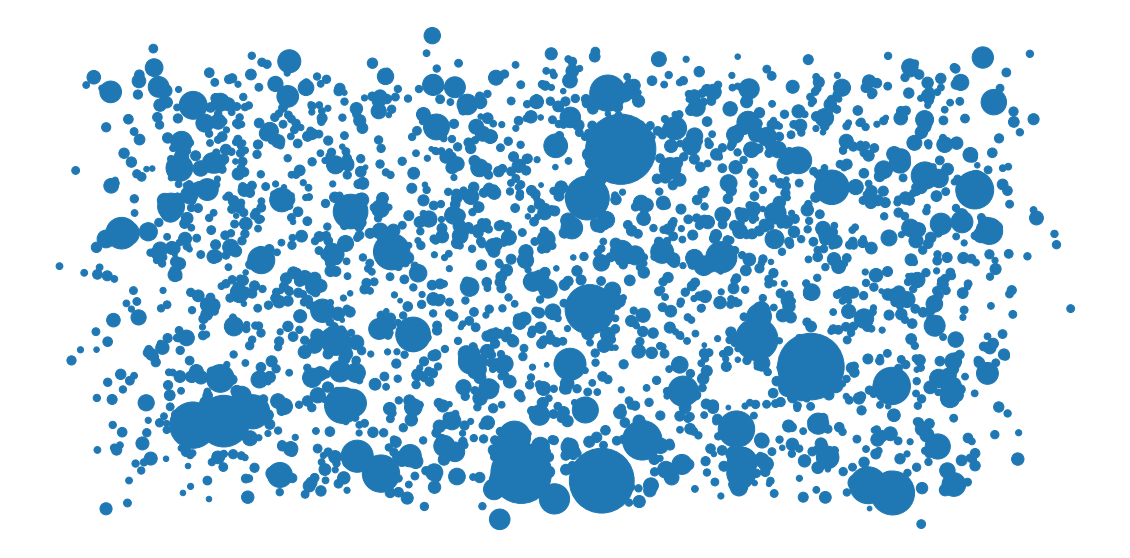

In [95]:
plt.figure(figsize=(20,10))
edges = nx.draw_networkx_edges(networkSmall, pos=nx.spectral_layout(networkSmall))
nx.draw(networkSmall, pos=nx.spectral_layout(networkSmall), node_size=[rescale(v,2,650,15,5000) for v in degreeDict.values()])